# Qualifying Exam 2025
### Code: 03/18/2025
### Editor: Akshita Gupta

#### Load Python Libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
np.random.seed(42) # To ensure reproducibility 

In [50]:
N = 1000 # Number of samples each class

In [51]:
means_institute1 = {
    "Class 1": np.array([5, 5]),  #Class 1: with Mean centered at [5,5]
    "Class 2": np.array([5, -5]), #Class 2: with Mean centered at [5,-5]
    "Class 3": np.array([-5, 5])  #Class 3: with Mean centered at [-5,5]
}

In [52]:
covariances_institute1 = {
    "Class 1": 0.1 * np.eye(2), #Class 1: covaruance 0.1I, I is identity matrix
    "Class 2": 0.2 * np.eye(2), #Class 2: covariance 0.2I
    "Class 3": 0.3 * np.eye(2)  #Class 3: covariance 0.3I
}

In [53]:
data_institute1 = {} #Empty list to save random variables generated

In [54]:
for i in means_institute1:
    data_institute1[i] = np.random.multivariate_normal(means_institute1[i], covariances_institute1[i], N) # Generate data for institute 1


In [38]:
data_institute1

{'Class 1': array([[5.15707481, 4.95627699],
        [5.2048171 , 5.48162433],
        [4.9259542 , 4.92595939],
        ...,
        [5.11113768, 5.33841122],
        [4.99161324, 4.72112675],
        [4.9484337 , 4.7644411 ]]),
 'Class 2': array([[ 4.6980511 , -5.06463071],
        [ 4.64561904, -5.13772458],
        [ 4.15314978, -4.90461215],
        ...,
        [ 4.07646679, -4.98727338],
        [ 4.07077431, -5.14324153],
        [ 5.73494105, -4.83871336]]),
 'Class 3': array([[-5.47295493,  4.98290915],
        [-4.99013175,  5.2588703 ],
        [-5.74865916,  5.32456246],
        ...,
        [-4.5270261 ,  5.09391761],
        [-4.36866863,  4.33320048],
        [-4.743693  ,  4.35901086]])}

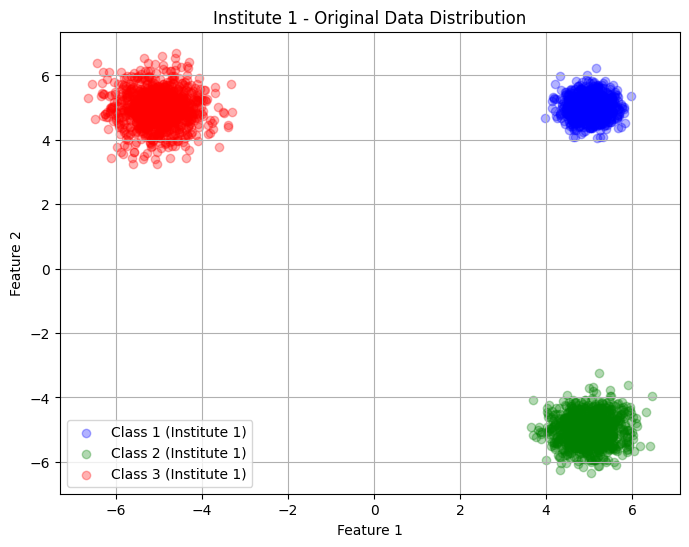

In [58]:
class_colors = {
    "Class 1": "blue",
    "Class 2": "green",
    "Class 3": "red"
}

plt.figure(figsize=(8, 6))
for i, data in data_institute1.items():
    plt.scatter(data[:, 0], data[:, 1], label=f"{i} (Institute 1)", alpha=0.3, color=class_colors[i])
    
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Institute 1 - Original Data Distribution")
plt.legend()
plt.grid(True)
plt.show()

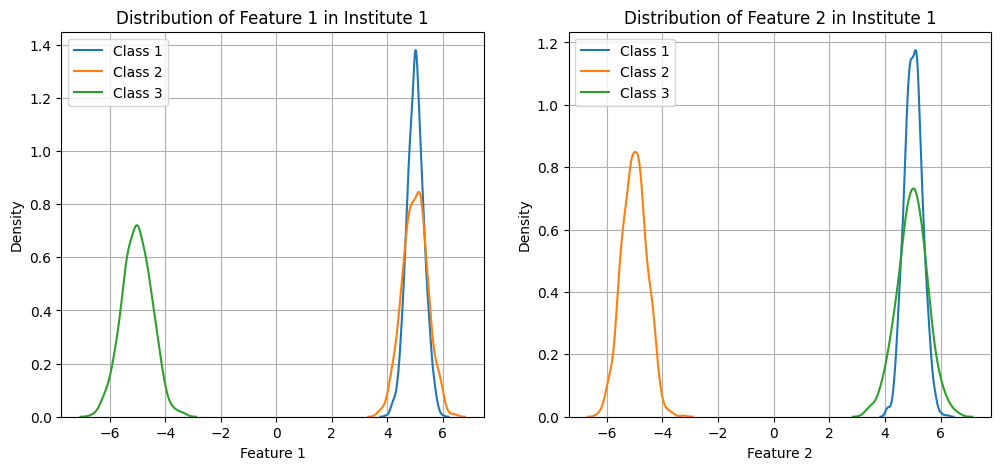

In [40]:
import seaborn as sns

# Plot normal distribution for each feature in each class
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, feature in enumerate(["Feature 1", "Feature 2"]):
    for cls, data in data_institute1.items():
        sns.kdeplot(data[:, i], label=f"{cls}", ax=axes[i])

    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")
    axes[i].set_title(f"Distribution of {feature} in Institute 1")
    axes[i].legend()
    axes[i].grid(True)

plt.show()


## Introducing Batch Shift in Data

In [41]:
x_shift = np.array([-4, -4])  
sigma_cov = 0.1 * np.eye(2)

In [42]:
data_institute2 = {}
for i, original_data in data_institute1.items():
    noise = np.random.multivariate_normal([0, 0], sigma_cov, N) 
    data_institute2[i] = original_data + x_shift + noise

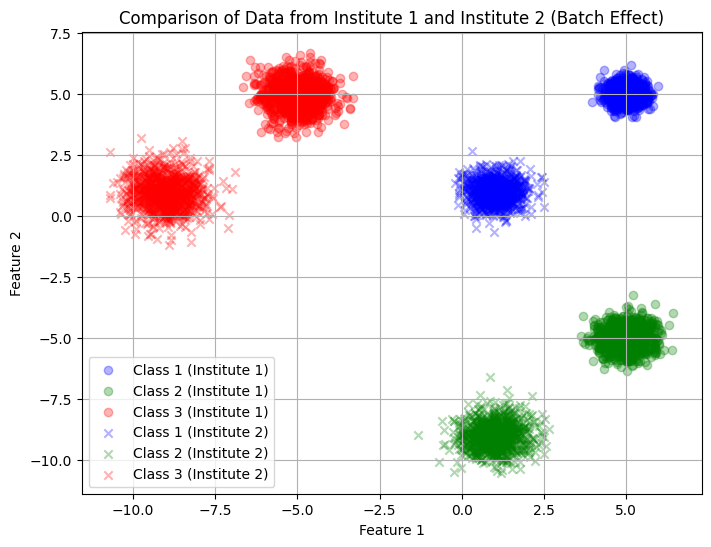

In [47]:
class_colors = {
    "Class 1": "blue",
    "Class 2": "green",
    "Class 3": "red"
}

# Plot comparison of Institute 1 and Institute 2 data with same colors for each class
plt.figure(figsize=(8, 6))
for i, data in data_institute1.items():
    plt.scatter(data[:, 0], data[:, 1], label=f"{i} (Institute 1)", alpha=0.3, color=class_colors[i], marker='o')

for i, data in data_institute2.items():
    plt.scatter(data[:, 0], data[:, 1], label=f"{i} (Institute 2)", alpha=0.3, color=class_colors[i], marker='x')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Comparison of Data from Institute 1 and Institute 2 (Batch Effect)")
plt.legend()
plt.grid(True)
plt.show()

In [44]:
data_institute2

{'Class 1': array([[0.80477135, 0.75675914],
        [0.90691151, 1.30833284],
        [0.85823393, 1.19069089],
        ...,
        [0.88742565, 2.03722894],
        [1.09501799, 0.45703719],
        [1.4711307 , 1.42149206]]),
 'Class 2': array([[ 0.68760759, -9.22389891],
        [ 0.59110929, -8.91170657],
        [ 0.55724353, -8.72420822],
        ...,
        [ 0.45411056, -8.57582878],
        [-0.56115786, -9.36628226],
        [ 1.89171589, -8.63493984]]),
 'Class 3': array([[-9.6875138 ,  0.88630173],
        [-9.17904023,  1.29378755],
        [-9.37007807,  1.08073752],
        ...,
        [-8.38429748,  0.72039142],
        [-8.39169711,  0.59820379],
        [-8.77553583,  0.05976015]])}

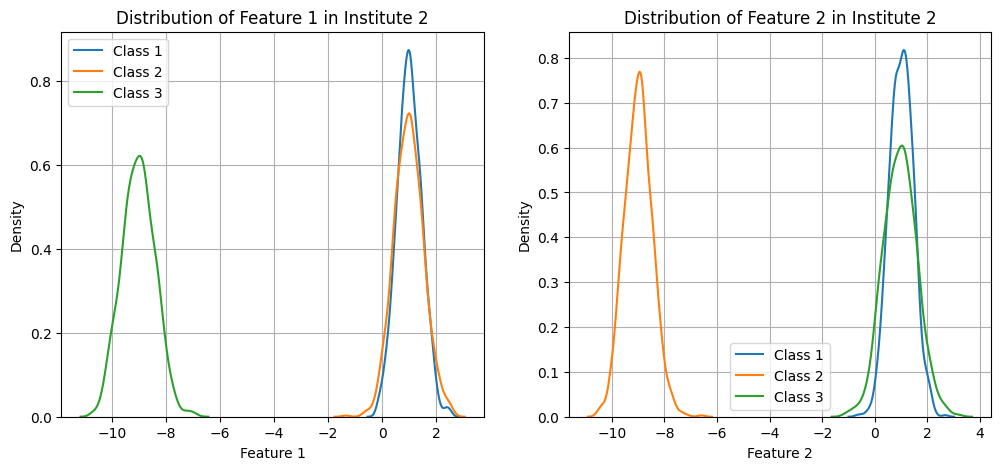

In [61]:
# Plot normal distribution for each feature in each class
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, feature in enumerate(["Feature 1", "Feature 2"]):
    for cls, data in data_institute2.items():
        sns.kdeplot(data[:, i], label=f"{cls}", ax=axes[i])

    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")
    axes[i].set_title(f"Distribution of {feature} in Institute 2")
    axes[i].legend()
    axes[i].grid(True)

plt.show()

## Solving domain shift

In [77]:
# Compute mean and standard deviation for each class in both institutes
means_1 = {}
means_2 = {}
stds_1 = {}
stds_2 = {}


In [78]:
for cls,data in data_institute1.items():
    means_1[cls] = np.mean(data_institute1[cls], axis=0)  # Getting mean for each Class in institute 1
    means_2[cls] = np.mean(data_institute2[cls], axis=0)  # Getting mean for each Class in institute 2

print(means_1,means_2)

{'Class 1': array([5.01049438, 5.01801934]), 'Class 2': array([ 4.9951623 , -5.00092465]), 'Class 3': array([-5.02358196,  4.97099444])} {'Class 1': array([1.01737911, 1.0083077 ]), 'Class 2': array([ 0.98725322, -8.99102094]), 'Class 3': array([-9.02891611,  0.96016858])}


In [79]:
for cls,data in data_institute1.items():
    stds_1[cls] = np.std(data_institute1[cls], axis=0)   # Getting Standard deviation for each Class in institue 1
    stds_2[cls] = np.std(data_institute2[cls], axis=0)   # Getting standard deviation for each Class in institute 2
    
print(stds_1,stds_2)

{'Class 1': array([0.3039336 , 0.32079779]), 'Class 2': array([0.45064794, 0.44833173]), 'Class 3': array([0.53921854, 0.55545045])} {'Class 1': array([0.45665133, 0.45344929]), 'Class 2': array([0.55099781, 0.53038767]), 'Class 3': array([0.61646117, 0.64311869])}


In [81]:
# Compute shift and scale correction per class
mean_shifts = {}
std_ratios = {}
class_labels = ['Class 1','Class 2','Class 3']
for cls in class_labels:
    print(cls)
    print(means_2)
    mean_shifts[cls] = means_2[cls] - means_1[cls]  # how much mean has shifted from institute 1 to institute 2
    std_ratios[cls] = stds_1[cls] / stds_2[cls]  # computing ratio of standard deviations



Class 1
{'Class 1': array([1.01737911, 1.0083077 ]), 'Class 2': array([ 0.98725322, -8.99102094]), 'Class 3': array([-9.02891611,  0.96016858])}
Class 2
{'Class 1': array([1.01737911, 1.0083077 ]), 'Class 2': array([ 0.98725322, -8.99102094]), 'Class 3': array([-9.02891611,  0.96016858])}
Class 3
{'Class 1': array([1.01737911, 1.0083077 ]), 'Class 2': array([ 0.98725322, -8.99102094]), 'Class 3': array([-9.02891611,  0.96016858])}


In [87]:
data_corrected = {}

for cls in class_labels:
    #data_corrected[cls] = (data_institute2[cls] - mu_shifts[cls]) * std_ratios[cls] ## Applying domain shift by subtracting each data point with the mean and then multiplying with variance
    data_corrected[cls] = (data_institute2[cls] - mean_shifts[cls])

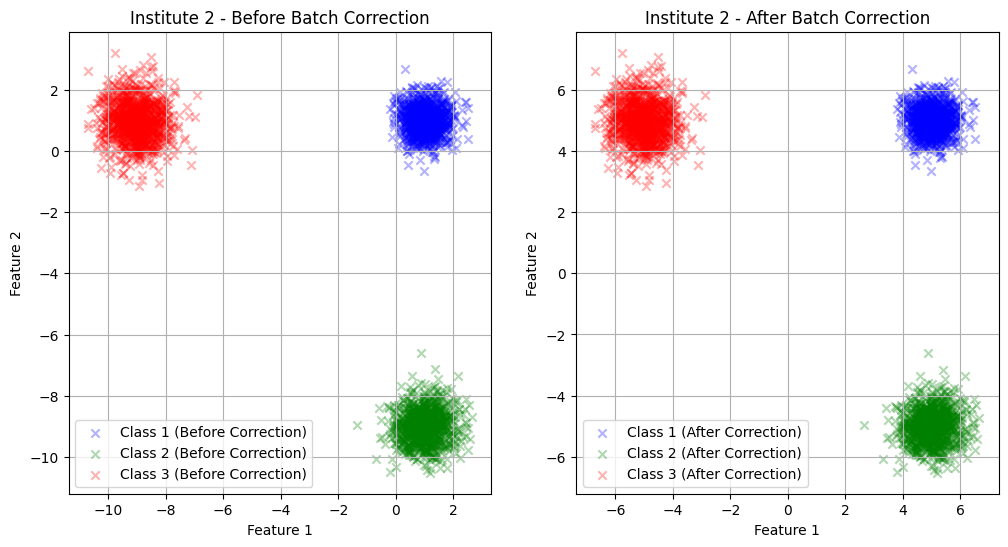

In [88]:
class_colors = {
    "Class 1": "blue",
    "Class 2": "green",
    "Class 3": "red"
}
# Plot comparison before and after batch correction
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Before correction
for cls, data in data_institute2.items():
    axes[0].scatter(data[:, 0], data[:, 1], label=f"{cls} (Before Correction)", alpha=0.3, marker='x', color=class_colors[cls])

axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].set_title("Institute 2 - Before Batch Correction")
axes[0].legend()
axes[0].grid(True)

# After correction
for cls, data in data_corrected.items():
    axes[1].scatter(data[:, 0], data[:, 1], label=f"{cls} (After Correction)", alpha=0.3, marker='x', color=class_colors[cls])

axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].set_title("Institute 2 - After Batch Correction")
axes[1].legend()
axes[1].grid(True)

plt.show()



In [89]:
# Store the corrected data
data_corrected

{'Class 1': array([[4.79788662, 4.76647078],
        [4.90002678, 5.31804448],
        [4.85134919, 5.20040253],
        ...,
        [4.88054092, 6.04694058],
        [5.08813325, 4.46674884],
        [5.46424597, 5.43120371]]),
 'Class 2': array([[ 4.69551667, -5.23380262],
        [ 4.59901837, -4.92161028],
        [ 4.56515261, -4.73411193],
        ...,
        [ 4.46201964, -4.5857325 ],
        [ 3.44675122, -5.37618598],
        [ 5.89962497, -4.64484355]]),
 'Class 3': array([[-5.68217965,  4.89712759],
        [-5.17370608,  5.30461341],
        [-5.36474392,  5.09156338],
        ...,
        [-4.37896333,  4.73121727],
        [-4.38636296,  4.60902965],
        [-4.77020168,  4.07058601]])}

## shift of -2 and 0.3

In [90]:
x_shift = np.array([-2, -2])  
sigma_cov = 0.3 * np.eye(2)

In [91]:
data_institute2 = {}
for i, original_data in data_institute1.items():
    noise = np.random.multivariate_normal([0, 0], sigma_cov, N) 
    data_institute2[i] = original_data + x_shift + noise

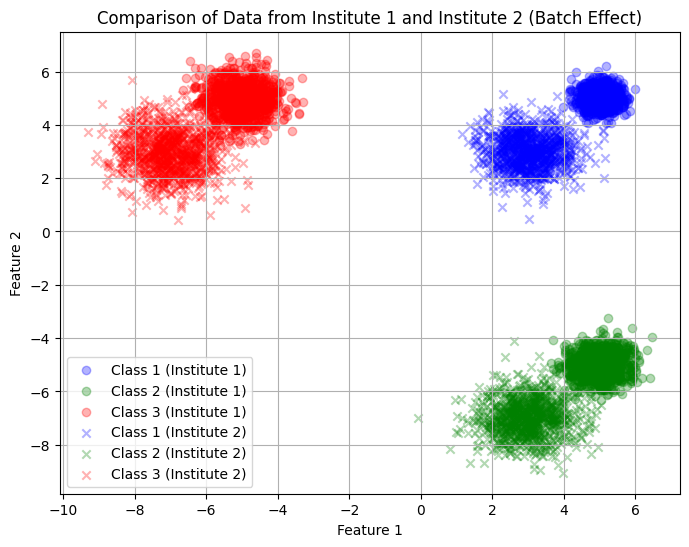

In [92]:
class_colors = {
    "Class 1": "blue",
    "Class 2": "green",
    "Class 3": "red"
}

# Plot comparison of Institute 1 and Institute 2 data with same colors for each class
plt.figure(figsize=(8, 6))
for i, data in data_institute1.items():
    plt.scatter(data[:, 0], data[:, 1], label=f"{i} (Institute 1)", alpha=0.3, color=class_colors[i], marker='o')

for i, data in data_institute2.items():
    plt.scatter(data[:, 0], data[:, 1], label=f"{i} (Institute 2)", alpha=0.3, color=class_colors[i], marker='x')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Comparison of Data from Institute 1 and Institute 2 (Batch Effect)")
plt.legend()
plt.grid(True)
plt.show()

In [93]:
# Compute mean and standard deviation for each class in both institutes
means_1 = {}
means_2 = {}
stds_1 = {}
stds_2 = {}

In [94]:
for cls,data in data_institute1.items():
    means_1[cls] = np.mean(data_institute1[cls], axis=0)  # Getting mean for each Class in institute 1
    means_2[cls] = np.mean(data_institute2[cls], axis=0)  # Getting mean for each Class in institute 2

print(means_1,means_2)

{'Class 1': array([5.01049438, 5.01801934]), 'Class 2': array([ 4.9951623 , -5.00092465]), 'Class 3': array([-5.02358196,  4.97099444])} {'Class 1': array([3.02241909, 3.00119828]), 'Class 2': array([ 2.98146338, -6.98377092]), 'Class 3': array([-7.03282098,  2.95224351])}


In [95]:
for cls,data in data_institute1.items():
    stds_1[cls] = np.std(data_institute1[cls], axis=0)   # Getting Standard deviation for each Class in institue 1
    stds_2[cls] = np.std(data_institute2[cls], axis=0)   # Getting standard deviation for each Class in institute 2
    
print(stds_1,stds_2)

{'Class 1': array([0.3039336 , 0.32079779]), 'Class 2': array([0.45064794, 0.44833173]), 'Class 3': array([0.53921854, 0.55545045])} {'Class 1': array([0.65834243, 0.6414523 ]), 'Class 2': array([0.71182483, 0.67681442]), 'Class 3': array([0.75558628, 0.78404672])}


In [96]:
# Compute shift and scale correction per class
mean_shifts = {}
std_ratios = {}
class_labels = ['Class 1','Class 2','Class 3']
for cls in class_labels:
    print(cls)
    print(means_2)
    mean_shifts[cls] = means_2[cls] - means_1[cls]  # how much mean has shifted from institute 1 to institute 2
    std_ratios[cls] = stds_1[cls] / stds_2[cls]  # computing ratio of standard deviations



Class 1
{'Class 1': array([3.02241909, 3.00119828]), 'Class 2': array([ 2.98146338, -6.98377092]), 'Class 3': array([-7.03282098,  2.95224351])}
Class 2
{'Class 1': array([3.02241909, 3.00119828]), 'Class 2': array([ 2.98146338, -6.98377092]), 'Class 3': array([-7.03282098,  2.95224351])}
Class 3
{'Class 1': array([3.02241909, 3.00119828]), 'Class 2': array([ 2.98146338, -6.98377092]), 'Class 3': array([-7.03282098,  2.95224351])}


In [101]:
data_corrected = {}

for cls in class_labels:
    data_corrected[cls] = (data_institute2[cls] - mean_shifts[cls]) * std_ratios[cls] ## Applying domain shift by subtracting each data point with the mean and then multiplying with variance


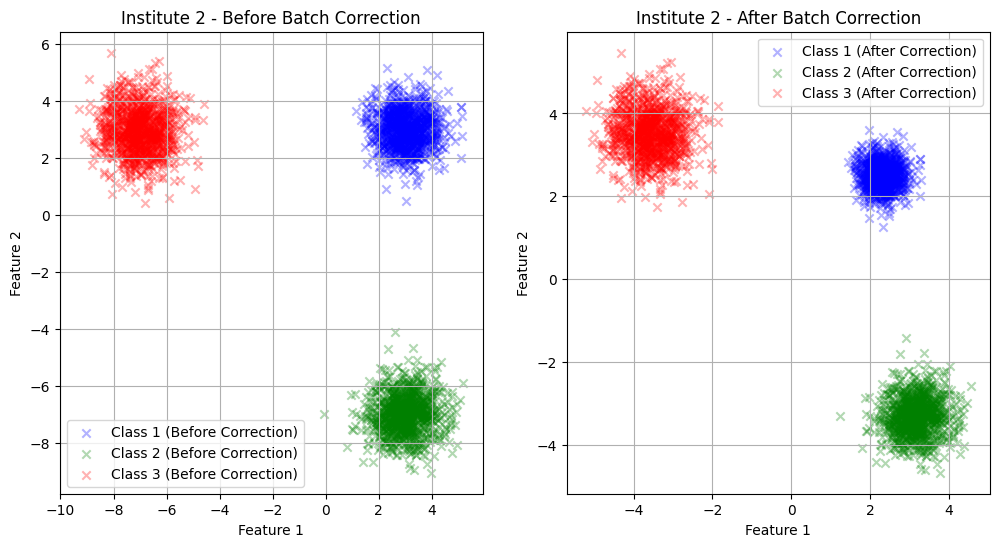

In [102]:
class_colors = {
    "Class 1": "blue",
    "Class 2": "green",
    "Class 3": "red"
}
# Plot comparison before and after batch correction
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Before correction
for cls, data in data_institute2.items():
    axes[0].scatter(data[:, 0], data[:, 1], label=f"{cls} (Before Correction)", alpha=0.3, marker='x', color=class_colors[cls])

axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].set_title("Institute 2 - Before Batch Correction")
axes[0].legend()
axes[0].grid(True)

# After correction
for cls, data in data_corrected.items():
    axes[1].scatter(data[:, 0], data[:, 1], label=f"{cls} (After Correction)", alpha=0.3, marker='x', color=class_colors[cls])

axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].set_title("Institute 2 - After Batch Correction")
axes[1].legend()
axes[1].grid(True)

plt.show()


## shift of 2 and 0.5

In [103]:
x_shift = np.array([2, 2])  
sigma_cov = 0.5 * np.eye(2)

In [104]:
data_institute2 = {}
for i, original_data in data_institute1.items():
    noise = np.random.multivariate_normal([0, 0], sigma_cov, N) 
    data_institute2[i] = original_data + x_shift + noise

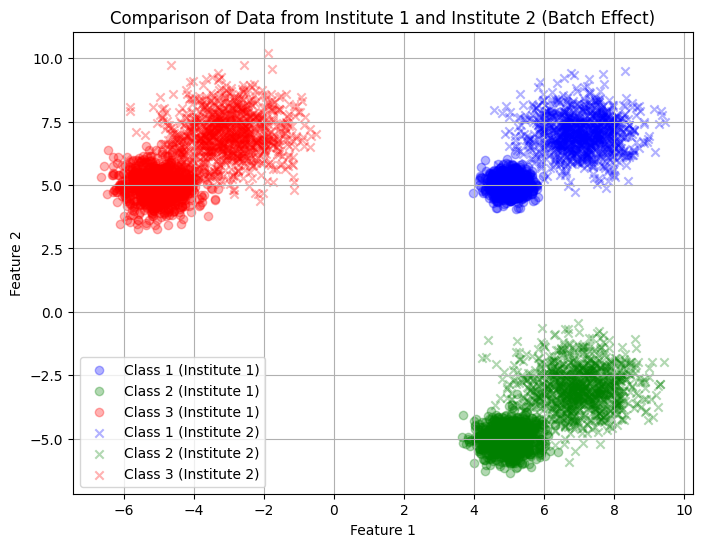

In [105]:
class_colors = {
    "Class 1": "blue",
    "Class 2": "green",
    "Class 3": "red"
}

# Plot comparison of Institute 1 and Institute 2 data with same colors for each class
plt.figure(figsize=(8, 6))
for i, data in data_institute1.items():
    plt.scatter(data[:, 0], data[:, 1], label=f"{i} (Institute 1)", alpha=0.3, color=class_colors[i], marker='o')

for i, data in data_institute2.items():
    plt.scatter(data[:, 0], data[:, 1], label=f"{i} (Institute 2)", alpha=0.3, color=class_colors[i], marker='x')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Comparison of Data from Institute 1 and Institute 2 (Batch Effect)")
plt.legend()
plt.grid(True)
plt.show()

In [106]:
# Compute mean and standard deviation for each class in both institutes
means_1 = {}
means_2 = {}
stds_1 = {}
stds_2 = {}

In [107]:
for cls,data in data_institute1.items():
    means_1[cls] = np.mean(data_institute1[cls], axis=0)  # Getting mean for each Class in institute 1
    means_2[cls] = np.mean(data_institute2[cls], axis=0)  # Getting mean for each Class in institute 2

print(means_1,means_2)

{'Class 1': array([5.01049438, 5.01801934]), 'Class 2': array([ 4.9951623 , -5.00092465]), 'Class 3': array([-5.02358196,  4.97099444])} {'Class 1': array([7.04161713, 7.03830284]), 'Class 2': array([ 6.99698104, -2.98581362]), 'Class 3': array([-3.01814676,  7.00927061])}


In [108]:
for cls,data in data_institute1.items():
    stds_1[cls] = np.std(data_institute1[cls], axis=0)   # Getting Standard deviation for each Class in institue 1
    stds_2[cls] = np.std(data_institute2[cls], axis=0)   # Getting standard deviation for each Class in institute 2
    
print(stds_1,stds_2)

{'Class 1': array([0.3039336 , 0.32079779]), 'Class 2': array([0.45064794, 0.44833173]), 'Class 3': array([0.53921854, 0.55545045])} {'Class 1': array([0.79524724, 0.74203351]), 'Class 2': array([0.85841337, 0.83388929]), 'Class 3': array([0.90090993, 0.8908855 ])}


In [109]:
# Compute shift and scale correction per class
mean_shifts = {}
std_ratios = {}
class_labels = ['Class 1','Class 2','Class 3']
for cls in class_labels:
    print(cls)
    print(means_2)
    mean_shifts[cls] = means_2[cls] - means_1[cls]  # how much mean has shifted from institute 1 to institute 2
    std_ratios[cls] = stds_1[cls] / stds_2[cls]  # computing ratio of standard deviations



Class 1
{'Class 1': array([7.04161713, 7.03830284]), 'Class 2': array([ 6.99698104, -2.98581362]), 'Class 3': array([-3.01814676,  7.00927061])}
Class 2
{'Class 1': array([7.04161713, 7.03830284]), 'Class 2': array([ 6.99698104, -2.98581362]), 'Class 3': array([-3.01814676,  7.00927061])}
Class 3
{'Class 1': array([7.04161713, 7.03830284]), 'Class 2': array([ 6.99698104, -2.98581362]), 'Class 3': array([-3.01814676,  7.00927061])}


In [112]:
data_corrected = {}

for cls in class_labels:
    data_corrected[cls] = (data_institute2[cls] - mean_shifts[cls]) * std_ratios[cls] ## Applying domain shift by subtracting each data point with the mean and then multiplying with variance


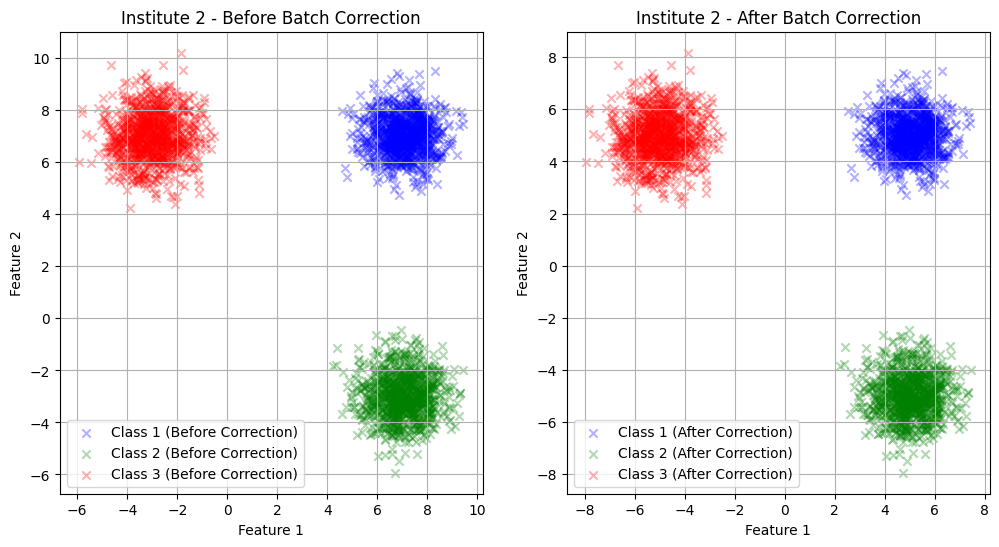

In [111]:
class_colors = {
    "Class 1": "blue",
    "Class 2": "green",
    "Class 3": "red"
}
# Plot comparison before and after batch correction
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Before correction
for cls, data in data_institute2.items():
    axes[0].scatter(data[:, 0], data[:, 1], label=f"{cls} (Before Correction)", alpha=0.3, marker='x', color=class_colors[cls])

axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].set_title("Institute 2 - Before Batch Correction")
axes[0].legend()
axes[0].grid(True)

# After correction
for cls, data in data_corrected.items():
    axes[1].scatter(data[:, 0], data[:, 1], label=f"{cls} (After Correction)", alpha=0.3, marker='x', color=class_colors[cls])

axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].set_title("Institute 2 - After Batch Correction")
axes[1].legend()
axes[1].grid(True)

plt.show()


## shift of 4 and 0.7

In [113]:
x_shift = np.array([4, 4])  
sigma_cov = 0.7 * np.eye(2)

In [114]:
data_institute2 = {}
for i, original_data in data_institute1.items():
    noise = np.random.multivariate_normal([0, 0], sigma_cov, N) 
    data_institute2[i] = original_data + x_shift + noise

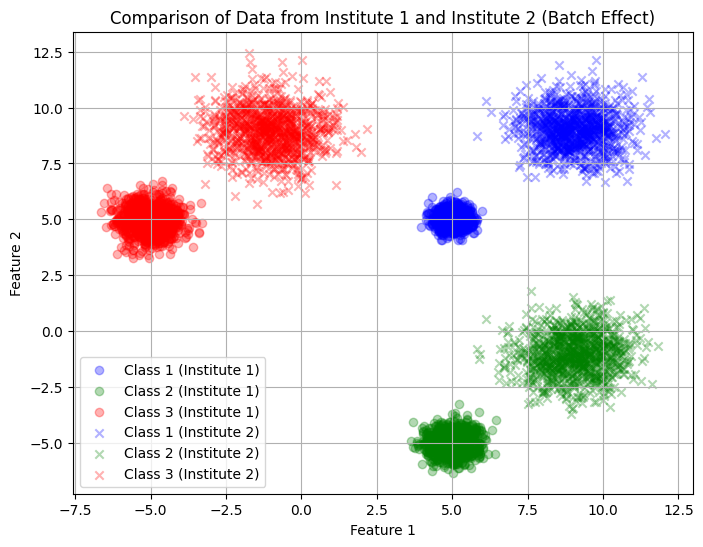

In [115]:
class_colors = {
    "Class 1": "blue",
    "Class 2": "green",
    "Class 3": "red"
}

# Plot comparison of Institute 1 and Institute 2 data with same colors for each class
plt.figure(figsize=(8, 6))
for i, data in data_institute1.items():
    plt.scatter(data[:, 0], data[:, 1], label=f"{i} (Institute 1)", alpha=0.3, color=class_colors[i], marker='o')

for i, data in data_institute2.items():
    plt.scatter(data[:, 0], data[:, 1], label=f"{i} (Institute 2)", alpha=0.3, color=class_colors[i], marker='x')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Comparison of Data from Institute 1 and Institute 2 (Batch Effect)")
plt.legend()
plt.grid(True)
plt.show()

In [116]:
# Compute mean and standard deviation for each class in both institutes
means_1 = {}
means_2 = {}
stds_1 = {}
stds_2 = {}

In [117]:
for cls,data in data_institute1.items():
    means_1[cls] = np.mean(data_institute1[cls], axis=0)  # Getting mean for each Class in institute 1
    means_2[cls] = np.mean(data_institute2[cls], axis=0)  # Getting mean for each Class in institute 2

print(means_1,means_2)

{'Class 1': array([5.01049438, 5.01801934]), 'Class 2': array([ 4.9951623 , -5.00092465]), 'Class 3': array([-5.02358196,  4.97099444])} {'Class 1': array([9.02928672, 9.02264009]), 'Class 2': array([ 9.02902572, -1.03317909]), 'Class 3': array([-1.05199254,  8.93999924])}


In [118]:
for cls,data in data_institute1.items():
    stds_1[cls] = np.std(data_institute1[cls], axis=0)   # Getting Standard deviation for each Class in institue 1
    stds_2[cls] = np.std(data_institute2[cls], axis=0)   # Getting standard deviation for each Class in institute 2
    
print(stds_1,stds_2)

{'Class 1': array([0.3039336 , 0.32079779]), 'Class 2': array([0.45064794, 0.44833173]), 'Class 3': array([0.53921854, 0.55545045])} {'Class 1': array([0.91735709, 0.86459692]), 'Class 2': array([0.96865484, 0.91755174]), 'Class 3': array([1.00828607, 0.97688319])}


In [119]:
# Compute shift and scale correction per class
mean_shifts = {}
std_ratios = {}
class_labels = ['Class 1','Class 2','Class 3']
for cls in class_labels:
    print(cls)
    print(means_2)
    mean_shifts[cls] = means_2[cls] - means_1[cls]  # how much mean has shifted from institute 1 to institute 2
    std_ratios[cls] = stds_1[cls] / stds_2[cls]  # computing ratio of standard deviations



Class 1
{'Class 1': array([9.02928672, 9.02264009]), 'Class 2': array([ 9.02902572, -1.03317909]), 'Class 3': array([-1.05199254,  8.93999924])}
Class 2
{'Class 1': array([9.02928672, 9.02264009]), 'Class 2': array([ 9.02902572, -1.03317909]), 'Class 3': array([-1.05199254,  8.93999924])}
Class 3
{'Class 1': array([9.02928672, 9.02264009]), 'Class 2': array([ 9.02902572, -1.03317909]), 'Class 3': array([-1.05199254,  8.93999924])}


In [120]:
data_corrected = {}

for cls in class_labels:
    #data_corrected[cls] = (data_institute2[cls] - mu_shifts[cls]) * std_ratios[cls] ## Applying domain shift by subtracting each data point with the mean and then multiplying with variance
    data_corrected[cls] = (data_institute2[cls] - mean_shifts[cls])

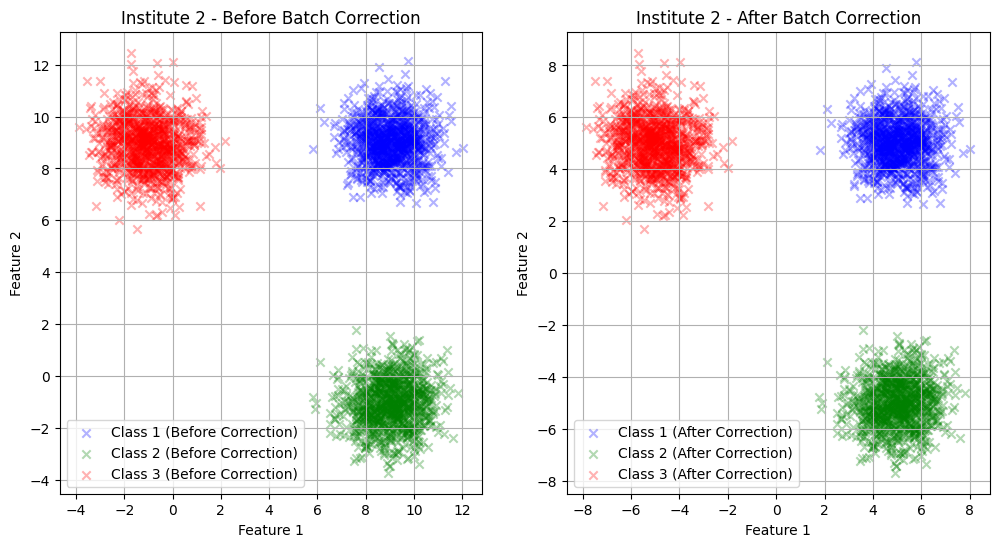

In [121]:
class_colors = {
    "Class 1": "blue",
    "Class 2": "green",
    "Class 3": "red"
}
# Plot comparison before and after batch correction
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Before correction
for cls, data in data_institute2.items():
    axes[0].scatter(data[:, 0], data[:, 1], label=f"{cls} (Before Correction)", alpha=0.3, marker='x', color=class_colors[cls])

axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].set_title("Institute 2 - Before Batch Correction")
axes[0].legend()
axes[0].grid(True)

# After correction
for cls, data in data_corrected.items():
    axes[1].scatter(data[:, 0], data[:, 1], label=f"{cls} (After Correction)", alpha=0.3, marker='x', color=class_colors[cls])

axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].set_title("Institute 2 - After Batch Correction")
axes[1].legend()
axes[1].grid(True)

plt.show()


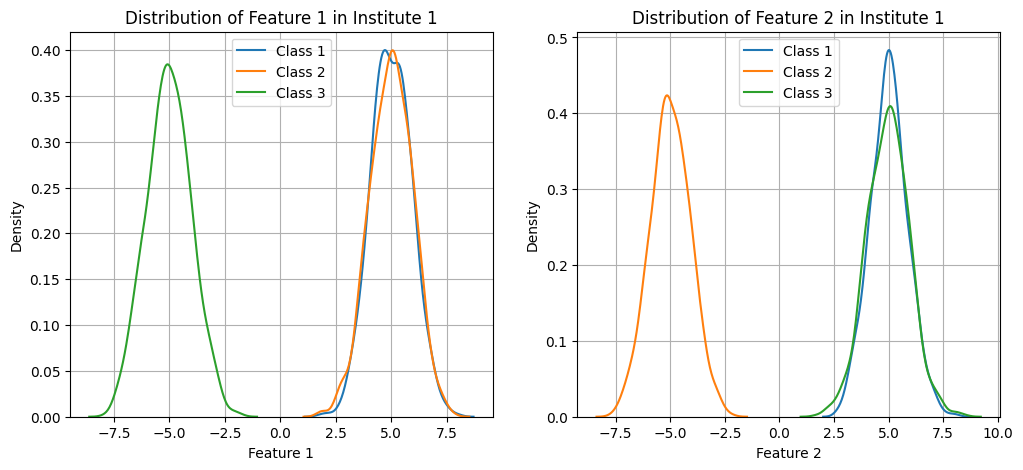

In [122]:
import seaborn as sns

# Plot normal distribution for each feature in each class
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, feature in enumerate(["Feature 1", "Feature 2"]):
    for cls, data in data_corrected.items():
        sns.kdeplot(data[:, i], label=f"{cls}", ax=axes[i])

    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")
    axes[i].set_title(f"Distribution of {feature} in Institute 1")
    axes[i].legend()
    axes[i].grid(True)

plt.show()
